In [1]:
import pandas as pd
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.regularizers import L1L2
from sklearn.preprocessing import StandardScaler
import textwrap
from sklearn.model_selection import train_test_split

K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [2]:
def convert_x_to_vect(y):
    #print(y)
    y_vect = np.zeros((len(y), np.amax(y)+1))
    #y_vect = np.zeros(y.shape(), 1)
    for i in range(len(y)):
        #rint(y[i])
        y_vect[i, y[i]] = 1
    
    #print(y_vect)
    return y_vect.tolist()

def convert_y_to_vect(y):
    #print(y)
    y_vect = np.zeros((len(y), 1))
    #y_vect = np.zeros(y.shape(), 1)
    for i in range(len(y)):
        y_vect[i, 0] = (y[i]=="YES")
        #rint(y[i])
        #if ():
    return y_vect

In [3]:
db = pd.read_csv("C:\\Users\\alexb\\Downloads\\qudditch_training.csv")

In [4]:
X = db.drop(['id','player_id','quidditch_league_player','finbourgh_flick', 'double_eight_loop', 'snitchnip', ],axis=1)
X['move_speciality'] = np.nan_to_num(pd.to_numeric(X['move_speciality'], errors='coerce'))
#X = X.drop(['plumpton_pass','porskoff_ploy', 'transylvanian_tackle', 'woollongong_shimmy'], axis=1)

featureCount = len(X.columns)

In [5]:
#Convert structure of Y to [1]
#Y = convert_y_to_vect(db['quidditch_league_player'])

#Convert structure of Y to [0, 1]
Y = np.asarray(convert_x_to_vect(db['quidditch_league_player'].astype('category').cat.codes))

print(Y)
print(Y.shape)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(101266, 2)


In [6]:
indent = "\t\t"
wrapper = textwrap.TextWrapper(initial_indent=indent, subsequent_indent=indent)

In [7]:
print("Column\t Added\t Category")
i=0
for index in X.columns:
    if (X[index].dtype != object):
        
        print(str(i) + '/' + str(featureCount) + "\t " + "None\t " + X[index].name)
        print()
        i+=1
        
    elif(X[index].dtype == object):
        
        newCols = [X[index].name + '_' + s for s in X[index].astype('category').cat.categories.tolist()]
        
        print(str(i) + '/' + str(featureCount) + "\t " + "+" + str(len(newCols)) + " \t " + X[index].name)
        print(wrapper.fill(str(newCols)))
        print()
        i+=1
        
        X[index] = X[index].astype('category').cat.codes
        temp = convert_x_to_vect(X[index])
        P = pd.DataFrame(temp, columns = newCols)
        
        X = X.drop([index],axis=1)
        X = pd.concat([P, X], axis=1)
        
print("New # of Features: " + str(len(X.columns)))

Column	 Added	 Category
0/42	 +6 	 house
		['house_?', 'house_Gryffindor', 'house_Hufflepuff', 'house_Other',
		'house_Ravenclaw', 'house_Slytherin']

1/42	 +3 	 gender
		['gender_Female', 'gender_Male', 'gender_Unknown/Invalid']

2/42	 None	 age

3/42	 +10 	 weight
		['weight_>200', 'weight_?', 'weight_[0-25)', 'weight_[100-125)',
		'weight_[125-150)', 'weight_[150-175)', 'weight_[175-200)',
		'weight_[25-50)', 'weight_[50-75)', 'weight_[75-100)']

4/42	 None	 foul_type_id

5/42	 None	 game_move_id

6/42	 None	 penalty_id

7/42	 None	 game_duration

8/42	 +18 	 player_code
		['player_code_?', 'player_code_BC', 'player_code_CH',
		'player_code_CM', 'player_code_CP', 'player_code_DM',
		'player_code_FR', 'player_code_HM', 'player_code_MC',
		'player_code_MD', 'player_code_MP', 'player_code_OG',
		'player_code_OT', 'player_code_PO', 'player_code_SI',
		'player_code_SP', 'player_code_UN', 'player_code_WC']

9/42	 None	 move_speciality

10/42	 None	 num_game_moves

11/42	 None	 num_game_lo

In [8]:
print(X.shape)
print(X)

(101266, 132)
        snitch_caught_No  snitch_caught_Yes  change_Ch  change_No  \
0                    1.0                0.0        0.0        1.0   
1                    0.0                1.0        1.0        0.0   
2                    0.0                1.0        0.0        1.0   
3                    0.0                1.0        1.0        0.0   
4                    0.0                1.0        1.0        0.0   
5                    0.0                1.0        0.0        1.0   
6                    0.0                1.0        1.0        0.0   
7                    0.0                1.0        0.0        1.0   
8                    0.0                1.0        1.0        0.0   
9                    0.0                1.0        1.0        0.0   
10                   0.0                1.0        0.0        1.0   
11                   0.0                1.0        1.0        0.0   
12                   0.0                1.0        1.0        0.0   
13                  

In [9]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
print(X)

C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


[[ 1.8303281  -1.8303281  -0.92681098 ... -0.21361642 -0.5032271
  -3.32095971]
 [-0.54635013  0.54635013  1.07896866 ... -0.21361642 -0.5032271
   0.8156263 ]
 [-0.54635013  0.54635013 -0.92681098 ... -0.21361642  0.28812323
  -0.73559345]
 ...
 [-0.54635013  0.54635013  1.07896866 ... -0.21361642 -0.5032271
   2.8839193 ]
 [-0.54635013  0.54635013  1.07896866 ... -0.21361642  0.28812323
   0.8156263 ]
 [ 1.8303281  -1.8303281  -0.92681098 ... -0.21361642 -0.5032271
   0.8156263 ]]


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
# fix random seed for reproducibility
np.random.seed(0)
# load pima indians dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# create model
model = Sequential()
model.add(Dense(2,  # output dim is 2, one score per each class
                activation = 'softmax',
                kernel_regularizer = L1L2(l1=0, l2=0),
                input_dim = len(X[0])))  # input dimension = number of features your data has

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60759 samples, validate on 40507 samples
Epoch 1/10
60759/60759 [==============================] - 7s 123us/step - loss: 0.6833 - acc: 0.6037 - val_loss: 0.6550 - val_acc: 0.6184
Epoch 2/10
60759/60759 [==============================] - 3s 55us/step - loss: 0.6574 - acc: 0.6202 - val_loss: 0.6535 - val_acc: 0.6193
Epoch 3/10
60759/60759 [==============================] - 3s 54us/step - loss: 0.6576 - acc: 0.6197 - val_loss: 0.6550 - val_acc: 0.6192
Epoch 4/10
60759/60759 [==============================] - 3s 55us/step - loss: 0.6573 - acc: 0.6212 - val_loss: 0.6562 - val_acc: 0.6190
Epoch 5/10
60759/60759 [==============================] - 3s 55us/step - loss: 0.6573 - acc: 0.6198 - val_loss: 0.6544 - val_acc: 0.6184
Epoch 6/10
60759/60759 [==============================] - 3s 54us/step - loss: 0.6573 - acc: 0.6231 - val_loss: 0.6537 - val_acc: 0.6201
Epoch 7

In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


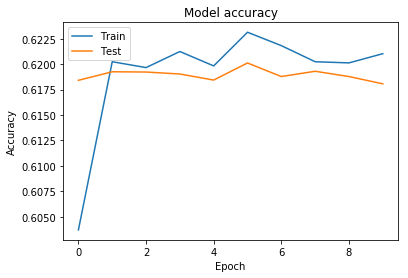

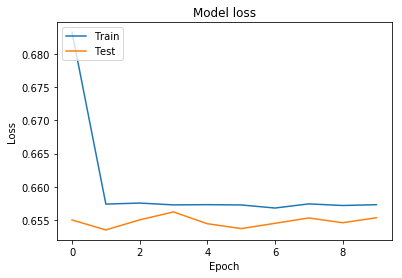

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()